# Reading in all extracted frame sequences (videos)

In [ ]:
import torch
from dataset import HelplessnessVideoDataset, TransformableSequenceSubset
from torch.utils.data import random_split
from torchvision import transforms

full_dataset = HelplessnessVideoDataset('../processed_frames')
print(len(full_dataset))
print(full_dataset[0])

generator = torch.Generator().manual_seed(42)
train_subset, val_subset = random_split(full_dataset, lengths=[0.8, 0.2], generator=generator)

train_transform = transforms.Compose([
    # transforms.RandomCrop(224, 64),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize()
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize()
])

train_dataset = TransformableSequenceSubset(train_subset, transform=train_transform)
val_dataset = TransformableSequenceSubset(val_subset, transform=val_transform)
print(len(train_dataset))
print(len(val_dataset))
print(train_dataset[0])
print(val_dataset[0])



200
../processed_frames/extreme-helpless/20250314-0111-19.1067370
160
40
(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0314, 0.0392, 0.0431],
          [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0471, 0.0510],
          [0.0000, 0.0000, 0.0000,  ..., 0.0549, 0.0510, 0.0549],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0314, 0.0392, 0.0431],
          [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0471, 0.0510],
          [0.0000, 0.0000, 0.0000,  ..., 0.0549, 0.0510, 0.0549],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0392, 0.0392],
          [0.0000, 0.0000, 0.0000,

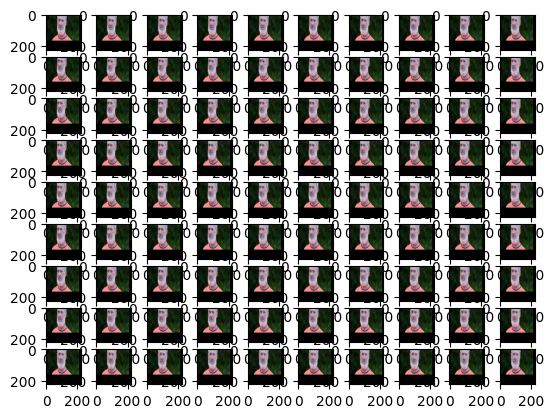

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()
rows = 9
columns = 10
data = train_dataset[0]
for i in range(0, rows * columns):
    img = data[0][:, i, : ,:]
    img = img.permute(1, 2, 0).numpy()
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()